In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d

import os

In [2]:
#mesh_file='/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/ats-transport-subgrid-testsuite/tests-updated/transport-coweeta/transport/2stream/'
mesh_file="/Users/ajc/Projects/ATS-Data/OR-CONDO/ats-tests/transport/test2n/"
#infile = [os.path.join(mesh_file,'visdump_data.h5'), os.path.join(mesh_file,'visdump_mesh.h5') ]
infile = [os.path.join(mesh_file,'visdump_surface_data.h5'), os.path.join(mesh_file,'visdump_surface_mesh.h5') ]

mesh = h5py.File(infile[1],'r')
mesh_data = list(mesh['0']['Mesh']['Nodes'])

In [3]:
X_mesh = []
Y_mesh = []
Z_mesh = []
#print (mesh_data)
for m in mesh_data:#[:30]:
    #print (m)
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])

In [4]:
Discharge = [0.9080831404970909, 0.374545887545661, 0.43239644141179195, 0.33837020936405693, 0.025871319142538998, 0.204746066590533, 0.128745291619659, 0.03380683234581899, 0.07169457541389,  0.06670998915332699, 0.031497253670805,  0.36350613999000597,  0.265706376594204,  0.09174899121199499,  0.041822935295661,  0.22223661842756398,  0.17922055278355797,  0.016846145349851998,  0.07235466943430699,  0.061198907756493, 0.019760430292550996, 0.054590237053091996]

Discharge = [d*100 for d in Discharge]

In [5]:
import xml.etree.ElementTree as ET
tree = ET.parse('/Users/ajc/Desktop/SimDataInputs/WorkSpace/ats-88/ats_meshing/examples/coweeta_river-centriod1.xml')
root = tree.getroot()
#print (root.attrib)
Ncells = []
for child in root:
    seg = child.attrib['name']
    if 'segment' in seg:
        for c1 in child.iter():
            if 'number of cells' in c1.attrib['name']:
                #print ('OUT',c1.keys(), c1.attrib['name'],c1.get('value'))
                Ncells.append(int(c1.get('value')))


In [6]:
Discharge_stream = [[d,]*c for d,c in zip(Discharge,Ncells)]
Discharge_stream = np.concatenate(Discharge_stream)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


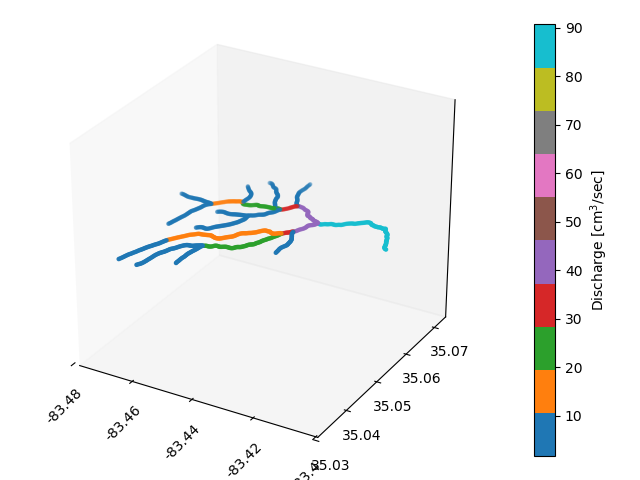

/Users/ajc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
/Users/ajc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


In [48]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#fig, ax = plt.subplots(1,1,figsize=(8,4))
x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]
for k in range(1):
    y1 = y_orig#[i + 0.5*thick[k] for i in y_orig[k]]
    y2 = [i + 0.000001 for i in y1]#[i - 0.5*thick[k] for i in y_orig[k]]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    #print (X,Y)
    #print ('------------')
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    data_color = cm.jet(Z_data/np.amax(Z_data))
    ran = Discharge_stream #np.random.random(len(x_orig))

    #surf = ax.plot_surface(X, Y, Z, facecolors=data_color,cmap=cm.coolwarm,
    #                   linewidth=1.5, antialiased=True,shade=True)
    sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=cm.tab10)#,vmin=0,vmax=10) map=plt.cm.get_cmap('prism', 5))
    plt.colorbar(sc, label='Discharge [cm$^3$/sec]',shrink=.96)#,aspect=10)
    ax.set_zlim(0,0.0)
    ax.set_zticks([])

    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_xticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=45, fontsize=10)
    
    xmin, xmax = ax.get_ylim()
    ax.set_yticks(np.round(np.linspace(xmin, xmax, 5), 2))
    ax.set_yticklabels(np.round(np.linspace(xmin, xmax, 5), 2), rotation=0, fontsize=10)
    ax.grid(False)
    plt.tight_layout(h_pad=1)
   
    plt.savefig('/Users/ajc/coweeta_river_discharge_3Dview.pdf',dpi=500)

#plt.show()


In [ ]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
data = np.linspace(1,0,len(X_mesh))
data_color = cm.jet(data/np.amax(data))
ax.scatter3D(X_mesh,Y_mesh,Z_mesh,facecolors=data_color,marker='p')
plt.savefig('/Users/ajc/coweeta_river.pdf')
plt.show()

In [ ]:

#%matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
x_orig = [0,  1,  2,  3,  4, 5, 5, 6,  7,  8,  9, 5,  6,  7,  8,  9 ]
y_orig = [0,0,0,0,0,0,0.5,1.5,2.5,3.5,4.5,-0.5,-1.5,-2.5,-3.5,-4.5]

centroid = []
thick = [2,1,1]
for k in range(1):
    y1 = y_orig#[i + 0.5*thick[k] for i in y_orig[k]]
    y2 = [i + 1 for i in y1]#[i - 0.5*thick[k] for i in y_orig[k]]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    print (X,Y)
    print ('------------')
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    data_color = cm.jet(Z_data/np.amax(Z_data))
    mark = {'marker': 'o'}
    surf = ax.plot_surface(X, Y, Z, facecolors=data_color,cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)
    ax.set_zlim(0,0.0)
    ax.set_zticks([])
    #print (data)
